<a href="https://colab.research.google.com/github/DrOPH-dot/AmazonShoppingScrapping/blob/main/Copie_de_ReconnaissanceImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import json
import os
import random, re, math
import tensorflow as tf, tensorflow.keras.backend as K
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
import  tensorflow.keras as keras 
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.layers import Softmax
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications import ResNet152V2, InceptionResNetV2, InceptionV3, Xception, VGG19
import tensorflow.keras.layers as L
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,GlobalMaxPooling2D,MaxPooling2D,Dropout
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras.layers import Activation
import io
import os




PATH_DIRECTORY = "/content/drive/MyDrive/ReconnaissanceImages/preprocessed_images_unzipped/preprocessed_images"
PATH_DIRECTORY_TRAIN = "/content/drive/MyDrive/ReconnaissanceImages/Data_train"
PATH_DIRECTORY_TRAIN_2 = "/content/drive/MyDrive/ReconnaissanceImages/Data_train2"
PATH_DIRECTORY_TRAIN_3 = "/content/drive/MyDrive/ReconnaissanceImages/Data_train3"
PATH_DIRECTORY_TRAIN_4 = "/content/drive/MyDrive/ReconnaissanceImages/Data_train4"
PATH_DIRECTORY_TEST = "/content/drive/MyDrive/ReconnaissanceImages/Data_test"
PATH_DIRECTORY_TEST2 = "/content/drive/MyDrive/ReconnaissanceImages/Data_test2"
PATH_DIRECTORY_MODELS = "/content/drive/MyDrive/ReconnaissanceImages/Models"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Présentation des données

Les données que nous allons étudier concernent des photographies du fond de l'oeil, classées selon différents types de conditions, dont en voici la liste:
* Normal (N)
* Retinopathie Diabetique  (D)
* Glaucome (G)
* Cataracte (C)
* Dégénérescence maculaire liée à l'âge (A)
* Retinopathie Hypertensive (H)
* Myopie Pathologique (M)
* Autres anomalies/maladies (O)



 **Info de Data set**: Retinophoto(image), ID ,Age,Right and Left eye Fundus (images Oeil droit et gauche), Right and Left Diagnostic Keywords (Diagnostique de chaque oeil).
**Normal (N)**: Absence d'anomalie .
**Rétinopathie diabétique (D)** : La rétinopathie diabétique (atteinte des yeux : œil et rétine) est une grave complication du diabète qui touche 50% des patients diabétiques de type 2. Les yeux sont particulièrement sensibles à l'atteinte des petits vaisseaux. Consiste de differentes stades : Non-proliférante , Pre-Proliférante et  Proliférante.  En France, la rétinopathie diabétique est la première cause de cécité avant 65 ans.
**Glaucome (G)**: Le glaucome est une maladie dégénérative du nerf optique qui entraîne une perte progressive de la vision commençant tout d'abord en périphérie et progressant graduellement vers le centre. Cette maladie est souvent associée à une pression intraoculaire (PIO) élevée qui comprime et endommage les fibres du nerf optique et de la rétine.
**Cataracte (C)**: La cataracte est l'opacification partielle ou totale du cristallin, lentille convergente située à l'intérieur de l'œil. Cette opacification est responsable d'une baisse progressive de la vue.
**Dégénérescence liée à l'âge (A)** : La dégénérescence maculaire liée à l'âge (DMLA) ou dégénérescence maculaire sénile est une maladie de la rétine provoquée par une dégénérescence progressive de la macula, partie centrale de la rétine, qui peut apparaître à partir de l'âge de 50 ans, et plus fréquemment à partir de 65 ans, provoquant un affaiblissement important des capacités visuelles, sans toutefois les anéantir. C'est la première cause de malvoyance après 50 ans dans les pays développés. 
**Rétinopathie Hypertensive  (H)** : La rétinopathie hypertensive est définie comme l'ensemble des altérations qui apparaissent dans le fond de l'œil en raison de la présence d'hypertension artérielle.
**Myopie Pathologique (M)**: Elle est caractérisée par une distension excessive du pôle postérieur de l’œil, avec allongement important de la longueur de l’oeil, et s’accompagne de dégénérescence chorio rétinienne.
**Autres anomalies/maladies (O)**: Toutes autres anomalie.







# Analyse du dataset

In [ ]:
link="https://drive.google.com/file/d/1nnC88EzrqbNvFKbP7lPqdn051tbAAGG0/view?usp=sharing"
 

In [ ]:
# Code to read CSV file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
driveFiles = GoogleDrive(gauth)


DEBUG:google.auth.transport.requests:Making request: POST https://oauth2.googleapis.com/token
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): oauth2.googleapis.com:443
DEBUG:urllib3.connectionpool:https://oauth2.googleapis.com:443 "POST /token HTTP/1.1" 200 None


In [ ]:
#GENERATION DE L ACCES AU DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/ReconnaissanceImages/preprocessed_images

ls: cannot access '/content/drive/ReconnaissanceImages/preprocessed_images': No such file or directory


In [ ]:

!ls /content/drive/MyDrive/ReconnaissanceImages/preprocessed_images_unzipped/preprocessed_images


0_left.jpg	2124_right.jpg	2825_right.jpg	3485_left.jpg	4552_left.jpg
0_right.jpg	2125_left.jpg	2826_left.jpg	3485_right.jpg	4552_right.jpg
1005_right.jpg	2125_right.jpg	2826_right.jpg	348_left.jpg	4553_left.jpg
1006_left.jpg	2126_left.jpg	2827_left.jpg	348_right.jpg	4553_right.jpg
1006_right.jpg	2126_right.jpg	2827_right.jpg	349_left.jpg	4555_left.jpg
1008_left.jpg	2127_left.jpg	2828_left.jpg	349_right.jpg	4555_right.jpg
1008_right.jpg	2127_right.jpg	2828_right.jpg	34_left.jpg	4556_left.jpg
100_left.jpg	2128_left.jpg	2829_left.jpg	34_right.jpg	4556_right.jpg
100_right.jpg	2128_right.jpg	2829_right.jpg	350_left.jpg	4557_left.jpg
1010_left.jpg	2129_left.jpg	282_left.jpg	350_right.jpg	4557_right.jpg
1010_right.jpg	2129_right.jpg	282_right.jpg	351_left.jpg	4558_left.jpg
1011_left.jpg	212_left.jpg	2830_left.jpg	351_right.jpg	4558_right.jpg
1011_right.jpg	212_right.jpg	2830_right.jpg	352_left.jpg	4559_left.jpg
1012_left.jpg	2130_left.jpg	2831_left.jpg	352_right.jpg	4559_right.jpg
1012_right.

In [ ]:
id = "1nnC88EzrqbNvFKbP7lPqdn051tbAAGG0"
print (id) # Verify that you have everything after '='

1nnC88EzrqbNvFKbP7lPqdn051tbAAGG0


In [ ]:
downloaded = driveFiles.CreateFile({'id':id}) 
downloaded.GetContentFile('full_df.csv')  
df_data = pd.read_csv('full_df.csv')
# Dataset is now stored in a Pandas Dataframe

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/__init__.py", line 44, in autodetect
    from . import file_cache
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 41, in <module>
    "file_cach

In [ ]:
df_data.shape

(6392, 19)

In [ ]:
df_data.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [ ]:
df_data["Patient Age"].describe()

count    6392.000000
mean       57.857947
std        11.727737
min         1.000000
25%        51.000000
50%        59.000000
75%        66.000000
max        91.000000
Name: Patient Age, dtype: float64

In [ ]:
df_data["D"].value_counts()

0    4269
1    2123
Name: D, dtype: int64

In [ ]:
df_labels = pd.DataFrame(zip(df_data["target"]))
l = df_data["target"]
res = []
for index,value in l.items():
    res.append(json.loads(value))
df = pd.DataFrame(res,columns=["N", "D","G","C","A","H","M","O"])
df

,N,D,G,C,A,H,M,O
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
6387,0,1,0,0,0,0,0,0
6388,0,1,0,0,0,0,0,0
6389,0,1,0,0,0,0,0,0
6390,0,1,0,0,0,0,0,0


In [ ]:
df_data["N_photo"] = df["N"]
df_data["D_photo"] = df["D"]
df_data["G_photo"] = df["G"]
df_data["C_photo"] = df["C"]
df_data["A_photo"] = df["A"]
df_data["H_photo"] = df["H"]
df_data["M_photo"] = df["M"]
df_data["O_photo"] = df["O"]
df_data

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename,N_photo,D_photo,G_photo,C_photo,A_photo,H_photo,M_photo,O_photo
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,1,0,0,0,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,0,1,0,0,0,0,0,0
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg,0,1,0,0,0,0,0,0
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg,0,1,0,0,0,0,0,0
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg,0,1,0,0,0,0,0,0
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg,0,1,0,0,0,0,0,0
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg,0,1,0,0,0,0,0,0


### Analyse des diagnostics par personne (inclu l'oeil droit et l'oiel gauche)

In [ ]:
df_types_photo = df_data[["N", "D","G","C","A","H","M","O"]]
df_types_photo.sum()

N    2101
D    2123
G     397
C     402
A     319
H     203
M     306
O    1588
dtype: int64

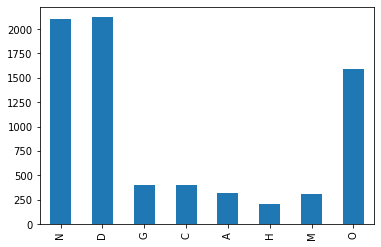

In [ ]:
df_types_photo.sum().plot(kind="bar")

### Analyse des diagnostics par oeil (avec photo individuelle de l'oeil - droit ou gauche)

In [ ]:
df_types = df_data[["N_photo", "D_photo","G_photo","C_photo","A_photo","H_photo","M_photo","O_photo"]]
df_types.sum()

N_photo    2873
D_photo    1608
G_photo     284
C_photo     293
A_photo     266
H_photo     128
M_photo     232
O_photo     708
dtype: int64

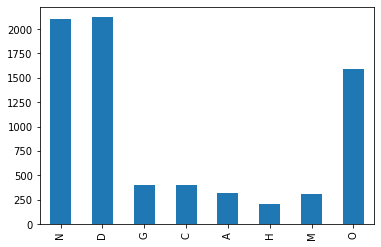

In [ ]:
df_types_photo.sum().plot(kind="bar")

# Augmentation des données

In [ ]:
'''
columns = df_data.columns.copy()
df_augmented = pd.DataFrame(columns=columns)
i=0
for ind in df_data.index:

    if (df_data["N_photo"][ind] == 1) or (df_data["D_photo"][ind] == 1):
        df_augmented.loc[i] = df_data.loc[ind]
        i+=1 

    elif (df_data["O_photo"][ind] == 1)  :
        for k in range(0,3) :
            df_augmented.loc[i] = df_data.loc[ind]
            i+=1 

    elif (df_data["H_photo"][ind] == 1)  :
        for k in range(0,10) :
            df_augmented.loc[i] = df_data.loc[ind]
            i+=1 

    elif (df_data["M_photo"][ind] == 1)   :
        for k in range(0,7) :
            df_augmented.loc[i] = df_data.loc[ind]
            i+=1

    elif (df_data["G_photo"][ind] == 1) or (df_data["C_photo"][ind] == 1) or (df_data["A_photo"][ind] == 1)   :
        for j in range(0,6) :
            df_augmented.loc[i] = df_data.loc[ind]
            i+=1 

df_augmented

'''

'\ncolumns = df_data.columns.copy()\ndf_augmented = pd.DataFrame(columns=columns)\ni=0\nfor ind in df_data.index:\n\n    if (df_data["N_photo"][ind] == 1) or (df_data["D_photo"][ind] == 1):\n        df_augmented.loc[i] = df_data.loc[ind]\n        i+=1 \n\n    elif (df_data["O_photo"][ind] == 1)  :\n        for k in range(0,3) :\n            df_augmented.loc[i] = df_data.loc[ind]\n            i+=1 \n\n    elif (df_data["H_photo"][ind] == 1)  :\n        for k in range(0,10) :\n            df_augmented.loc[i] = df_data.loc[ind]\n            i+=1 \n\n    elif (df_data["M_photo"][ind] == 1)   :\n        for k in range(0,7) :\n            df_augmented.loc[i] = df_data.loc[ind]\n            i+=1\n\n    elif (df_data["G_photo"][ind] == 1) or (df_data["C_photo"][ind] == 1) or (df_data["A_photo"][ind] == 1)   :\n        for j in range(0,6) :\n            df_augmented.loc[i] = df_data.loc[ind]\n            i+=1 \n\ndf_augmented\n\n'

In [ ]:
df_augmented_types = df_augmented[["N_photo", "D_photo","G_photo","C_photo","A_photo","H_photo","M_photo","O_photo"]]
df_augmented_types.sum()

NameError: ignored

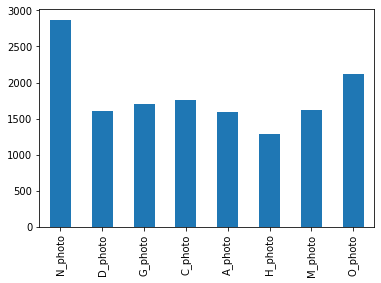

In [ ]:
df_augmented_types.sum().plot(kind="bar")

# Séparation des données de Train et de Test


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
X_col = "filename"
y_col = "target"
#X = df_augmented[X_col]
#y = df_augmented[y_col]
X = df_data[X_col]
y = df_data[y_col]
X,y

(0         0_right.jpg
 1         1_right.jpg
 2         2_right.jpg
 3         4_right.jpg
 4         5_right.jpg
             ...      
 6387    4686_left.jpg
 6388    4688_left.jpg
 6389    4689_left.jpg
 6390    4690_left.jpg
 6391    4784_left.jpg
 Name: filename, Length: 6392, dtype: object, 0       [1, 0, 0, 0, 0, 0, 0, 0]
 1       [1, 0, 0, 0, 0, 0, 0, 0]
 2       [0, 1, 0, 0, 0, 0, 0, 0]
 3       [0, 1, 0, 0, 0, 0, 0, 0]
 4       [0, 1, 0, 0, 0, 0, 0, 0]
                   ...           
 6387    [0, 1, 0, 0, 0, 0, 0, 0]
 6388    [0, 1, 0, 0, 0, 0, 0, 0]
 6389    [0, 1, 0, 0, 0, 0, 0, 0]
 6390    [0, 1, 0, 0, 0, 0, 0, 0]
 6391    [0, 0, 0, 0, 0, 1, 0, 0]
 Name: target, Length: 6392, dtype: object)

In [ ]:
type(df_data['target'][0])

str

In [ ]:
X.head()

0    0_right.jpg
1    1_right.jpg
2    2_right.jpg
3    4_right.jpg
4    5_right.jpg
Name: filename, dtype: object

In [ ]:
y.head()

0    [1, 0, 0, 0, 0, 0, 0, 0]
1    [1, 0, 0, 0, 0, 0, 0, 0]
2    [0, 1, 0, 0, 0, 0, 0, 0]
3    [0, 1, 0, 0, 0, 0, 0, 0]
4    [0, 1, 0, 0, 0, 0, 0, 0]
Name: target, dtype: object

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)


In [ ]:
pd.DataFrame([X_train,y_train]).to_csv(PATH_DIRECTORY_TEST+'X_train.csv', index = False, header=True)
pd.DataFrame([X_test,y_test]).to_csv(PATH_DIRECTORY_TEST+'X_test.csv', index = False, header=True)

In [ ]:
X_train,X_test,y_train,y_test

(2273    3159_right.jpg
 5609     3315_left.jpg
 4614     2152_left.jpg
 3658      542_left.jpg
 471      540_right.jpg
              ...      
 3772      670_left.jpg
 5191     2858_left.jpg
 5226     2899_left.jpg
 5390     3079_left.jpg
 860     1008_right.jpg
 Name: filename, Length: 5113, dtype: object, 2575    3969_right.jpg
 4763     2391_left.jpg
 1835    2681_right.jpg
 3106    4580_right.jpg
 3433      278_left.jpg
              ...      
 3316      143_left.jpg
 6216     4476_left.jpg
 3442      289_left.jpg
 5903     4126_left.jpg
 5949     4182_left.jpg
 Name: filename, Length: 1279, dtype: object, 2273    [1, 0, 0, 0, 0, 0, 0, 0]
 5609    [1, 0, 0, 0, 0, 0, 0, 0]
 4614    [0, 0, 0, 1, 0, 0, 0, 0]
 3658    [0, 1, 0, 0, 0, 0, 0, 0]
 471     [0, 0, 0, 0, 1, 0, 0, 0]
                   ...           
 3772    [0, 0, 0, 0, 0, 0, 0, 1]
 5191    [1, 0, 0, 0, 0, 0, 0, 0]
 5226    [1, 0, 0, 0, 0, 0, 0, 0]
 5390    [1, 0, 0, 0, 0, 0, 0, 0]
 860     [0, 0, 0, 0, 0, 0, 0, 1]
 Name: t

# Préparation des Datasets pour le générateur d'images


In [ ]:
df_train = pd.DataFrame(columns=["filename",'target'])
df_train["filename"] = X_train
df_train["target"] = y_train
df_test = pd.DataFrame(columns=["filename",'target'])
df_test["filename"] = X_test
df_test["target"] = y_test

In [ ]:
df_train,df_test

(            filename                    target
 2273  3159_right.jpg  [1, 0, 0, 0, 0, 0, 0, 0]
 5609   3315_left.jpg  [1, 0, 0, 0, 0, 0, 0, 0]
 4614   2152_left.jpg  [0, 0, 0, 1, 0, 0, 0, 0]
 3658    542_left.jpg  [0, 1, 0, 0, 0, 0, 0, 0]
 471    540_right.jpg  [0, 0, 0, 0, 1, 0, 0, 0]
 ...              ...                       ...
 3772    670_left.jpg  [0, 0, 0, 0, 0, 0, 0, 1]
 5191   2858_left.jpg  [1, 0, 0, 0, 0, 0, 0, 0]
 5226   2899_left.jpg  [1, 0, 0, 0, 0, 0, 0, 0]
 5390   3079_left.jpg  [1, 0, 0, 0, 0, 0, 0, 0]
 860   1008_right.jpg  [0, 0, 0, 0, 0, 0, 0, 1]
 
 [5113 rows x 2 columns],             filename                    target
 2575  3969_right.jpg  [0, 1, 0, 0, 0, 0, 0, 0]
 4763   2391_left.jpg  [1, 0, 0, 0, 0, 0, 0, 0]
 1835  2681_right.jpg  [1, 0, 0, 0, 0, 0, 0, 0]
 3106  4580_right.jpg  [0, 1, 0, 0, 0, 0, 0, 0]
 3433    278_left.jpg  [1, 0, 0, 0, 0, 0, 0, 0]
 ...              ...                       ...
 3316    143_left.jpg  [1, 0, 0, 0, 0, 0, 0, 0]
 6216   4476_

In [ ]:
type(df_train['target'][0])

str

In [ ]:
df_augmented_train = pd.DataFrame(columns=["filename",'target'])
df_augmented_test = pd.DataFrame(columns=["filename",'target'])
df_augmented_train

,filename,target


In [ ]:
path_test_n = PATH_DIRECTORY_TEST+"2/n"
path_test_d = PATH_DIRECTORY_TEST+"2/d"
path_test_g = PATH_DIRECTORY_TEST+"2/g"
path_test_c = PATH_DIRECTORY_TEST+"2/c"
path_test_a = PATH_DIRECTORY_TEST+"2/a"
path_test_h = PATH_DIRECTORY_TEST+"2/h"
path_test_m = PATH_DIRECTORY_TEST+"2/m"
path_test_o = PATH_DIRECTORY_TEST+"2/o"

df_test_n = df_test[df_test.target == target_n]
df_test_d = df_test[df_test.target == target_d]
df_test_g = df_test[df_test.target == target_g]
df_test_c = df_test[df_test.target == target_c]
df_test_a = df_test[df_test.target == target_a]
df_test_h = df_test[df_test.target == target_h]
df_test_m = df_test[df_test.target == target_m]
df_test_o = df_test[df_test.target == target_o]

#df_test_n,df_test_d ,df_test_g,df_test_c,df_test_a,df_test_h,df_test_m,df_test_o


In [ ]:
df_test_a

,filename,target
1322,1874_right.jpg,"[0, 0, 0, 0, 1, 0, 0, 0]"
132,158_right.jpg,"[0, 0, 0, 0, 1, 0, 0, 0]"
1321,1873_right.jpg,"[0, 0, 0, 0, 1, 0, 0, 0]"
1297,1834_right.jpg,"[0, 0, 0, 0, 1, 0, 0, 0]"
1056,1295_right.jpg,"[0, 0, 0, 0, 1, 0, 0, 0]"
3910,821_left.jpg,"[0, 0, 0, 0, 1, 0, 0, 0]"
1330,1885_right.jpg,"[0, 0, 0, 0, 1, 0, 0, 0]"
3936,855_left.jpg,"[0, 0, 0, 0, 1, 0, 0, 0]"
4515,1881_left.jpg,"[0, 0, 0, 0, 1, 0, 0, 0]"
230,266_right.jpg,"[0, 0, 0, 0, 1, 0, 0, 0]"


In [ ]:
for ind in df_test_n.index:
  filename = df_test_n.loc[ind]['filename']
  imagePath = PATH_DIRECTORY+"/" + filename
  path = path_test_n+"/" 
  image = cv2.imread(imagePath, cv2.IMREAD_UNCHANGED)
  image = cv2.resize(image,(224,224))
  cv2.imwrite(os.path.join(path , filename), image)

In [ ]:
df_test_d

,filename,target
2575,3969_right.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"
3106,4580_right.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"
476,546_right.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"
5744,3943_left.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"
247,284_right.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"
...,...,...
509,582_right.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"
748,868_right.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"
6216,4476_left.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"
3442,289_left.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"


In [ ]:
import logging
for ind in df_test_d.index:
  filename = df_test_d.loc[ind]['filename']
  imagePath = PATH_DIRECTORY+"/" + filename
  pathd = path_test_d+"/"
  image = cv2.imread(imagePath, cv2.IMREAD_UNCHANGED)
  image = cv2.resize(image,(224,224))
  #logging.error(pathd)
  cv2.imwrite(os.path.join(pathd , filename), image)

In [ ]:





for ind in df_test_g.index:
  filename = df_test_g.loc[ind]['filename']
  imagePath = PATH_DIRECTORY+"/" + filename
  pathg = path_test_g+"/"
  image = cv2.imread(imagePath, cv2.IMREAD_UNCHANGED)
  image = cv2.resize(image,(224,224))
  cv2.imwrite(os.path.join(pathg , filename), image)

for ind in df_test_c.index:
  filename = df_test_c.loc[ind]['filename']
  imagePath = PATH_DIRECTORY+"/" + filename
  pathc = path_test_c+"/" 
  image = cv2.imread(imagePath, cv2.IMREAD_UNCHANGED)
  image = cv2.resize(image,(224,224))
  cv2.imwrite(os.path.join(pathc , filename), image)

for ind in df_test_a.index:
  filename = df_test_a.loc[ind]['filename']
  imagePath = PATH_DIRECTORY+"/" + filename
  patha = path_test_a+"/" 
  image = cv2.imread(imagePath, cv2.IMREAD_UNCHANGED)
  image = cv2.resize(image,(224,224))
  cv2.imwrite(os.path.join(patha , filename), image)

for ind in df_test_h.index:
  filename = df_test_h.loc[ind]['filename']
  imagePath = PATH_DIRECTORY+"/" + filename
  path = path_test_h+"/" 
  image = cv2.imread(imagePath, cv2.IMREAD_UNCHANGED)
  image = cv2.resize(image,(224,224))
  cv2.imwrite(os.path.join(path , filename), image)

for ind in df_test_m.index:
  filename = df_test_m.loc[ind]['filename']
  imagePath = PATH_DIRECTORY+"/" + filename
  path = path_test_m+"/" 
  image = cv2.imread(imagePath, cv2.IMREAD_UNCHANGED)
  image = cv2.resize(image,(224,224))
  cv2.imwrite(os.path.join(path , filename), image)

for ind in df_test_o.index:
  filename =  df_test_o.loc[ind]['filename']
  imagePath = PATH_DIRECTORY+"/" + filename
  path = path_test_o+"/"
  image = cv2.imread(imagePath, cv2.IMREAD_UNCHANGED)
  image = cv2.resize(image,(224,224))
  cv2.imwrite(os.path.join(path , filename), image)

In [ ]:
'''
for ind in df_test_n.index:
  imagePath = PATH_DIRECTORY+"/" + df_test_n.loc[ind]['filename']
  path = path_test_n+"/" 
  !cp $imagePath $path

for ind in df_test_d.index:
  imagePath = PATH_DIRECTORY+"/" + df_test_d.loc[ind]['filename']
  path = path_test_d+"/"
  !cp $imagePath $path


for ind in df_test_g.index:
  imagePath = PATH_DIRECTORY+"/" + df_test_g.loc[ind]['filename']
  path = path_test_g+"/"
  !cp $imagePath $path

for ind in df_test_c.index:
  imagePath = PATH_DIRECTORY+"/" + df_test_c.loc[ind]['filename']
  path = path_test_c+"/" 
  !cp $imagePath $path

for ind in df_test_a.index:
  imagePath = PATH_DIRECTORY+"/" + df_test_a.loc[ind]['filename']
  path = path_test_a+"/" 
  !cp $imagePath $path

for ind in df_test_h.index:
  imagePath = PATH_DIRECTORY+"/" + df_test_h.loc[ind]['filename']
  path = path_test_h+"/" 
  !cp $imagePath $path

for ind in df_test_m.index:
  imagePath = PATH_DIRECTORY+"/" + df_test_m.loc[ind]['filename']
  path = path_test_m+"/" 
  !cp $imagePath $path

for ind in df_test_o.index:
  imagePath = PATH_DIRECTORY+"/" + df_test_o.loc[ind]['filename']
  path = path_test_o+"/"
  !cp $imagePath $path
'''

'2391_left.jpg'

In [ ]:
df_train

,filename,target
2273,3159_right.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]"
5609,3315_left.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]"
4614,2152_left.jpg,"[0, 0, 0, 1, 0, 0, 0, 0]"
3658,542_left.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"
471,540_right.jpg,"[0, 0, 0, 0, 1, 0, 0, 0]"
...,...,...
3772,670_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 1]"
5191,2858_left.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]"
5226,2899_left.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]"
5390,3079_left.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]"


In [ ]:
df_test

,filename,target
2575,3969_right.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"
4763,2391_left.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]"
1835,2681_right.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]"
3106,4580_right.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"
3433,278_left.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]"
...,...,...
3316,143_left.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]"
6216,4476_left.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"
3442,289_left.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"
5903,4126_left.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]"


In [ ]:
df_train["target"].value_counts()


[1, 0, 0, 0, 0, 0, 0, 0]    2304
[0, 1, 0, 0, 0, 0, 0, 0]    1275
[0, 0, 0, 0, 0, 0, 0, 1]     572
[0, 0, 0, 1, 0, 0, 0, 0]     235
[0, 0, 1, 0, 0, 0, 0, 0]     223
[0, 0, 0, 0, 1, 0, 0, 0]     220
[0, 0, 0, 0, 0, 0, 1, 0]     184
[0, 0, 0, 0, 0, 1, 0, 0]     100
Name: target, dtype: int64

In [ ]:
target_n = '[1, 0, 0, 0, 0, 0, 0, 0]'
target_d = '[0, 1, 0, 0, 0, 0, 0, 0]'
target_g = '[0, 0, 1, 0, 0, 0, 0, 0]'
target_c = '[0, 0, 0, 1, 0, 0, 0, 0]'
target_a = '[0, 0, 0, 0, 1, 0, 0, 0]'
target_h = '[0, 0, 0, 0, 0, 1, 0, 0]'
target_m = '[0, 0, 0, 0, 0, 0, 1, 0]'
target_o = '[0, 0, 0, 0, 0, 0, 0, 1]'

In [ ]:


df_train_n = df_train[df_train.target == target_n]
df_train_d = df_train[df_train.target == target_d]
df_train_g = df_train[df_train.target == target_g]
df_train_c = df_train[df_train.target == target_c]
df_train_a = df_train[df_train.target == target_a]
df_train_h = df_train[df_train.target == target_h]
df_train_m = df_train[df_train.target == target_m]
df_train_o = df_train[df_train.target == target_o]
(df_train_n.shape,df_train_d.shape,df_train_g.shape,df_train_c.shape,df_train_a.shape,df_train_h.shape,df_train_m.shape,df_train_o.shape)

((2304, 2),
 (1275, 2),
 (223, 2),
 (235, 2),
 (220, 2),
 (100, 2),
 (184, 2),
 (572, 2))

In [ ]:
path_n = PATH_DIRECTORY_TRAIN_3+"/n"
path_d = PATH_DIRECTORY_TRAIN_3+"/d"
path_g = PATH_DIRECTORY_TRAIN_3+"/g"
path_c = PATH_DIRECTORY_TRAIN_3+"/c"
path_a = PATH_DIRECTORY_TRAIN_3+"/a"
path_h = PATH_DIRECTORY_TRAIN_3+"/h"
path_m = PATH_DIRECTORY_TRAIN_3+"/m"
path_o = PATH_DIRECTORY_TRAIN_3+"/o"

In [ ]:
import cv2
df_train_n_1000 = df_train_n.iloc[:1000]

df_train_d_1000 = df_train_d.iloc[:1000]

path_n = PATH_DIRECTORY_TRAIN_3+"/n/"
path_d = PATH_DIRECTORY_TRAIN_3+"/d/"

for ind in df_train_n_1000.index:
  imagePath = PATH_DIRECTORY+"/" + df_train_n_1000.loc[ind]['filename']
  image = cv2.imread(imagePath, cv2.IMREAD_UNCHANGED)
  image = cv2.resize(image,(224,224))
  cv2.imwrite(os.path.join(path_n , df_train_n_1000.loc[ind]['filename']), image)

for ind in df_train_d_1000.index:
  imagePath = PATH_DIRECTORY+"/" + df_train_d_1000.loc[ind]['filename']
  image = cv2.imread(imagePath, cv2.IMREAD_UNCHANGED)
  image = cv2.resize(image,(224,224))
  cv2.imwrite(os.path.join(path_d , df_train_d_1000.loc[ind]['filename']), image)


##  Definition des fonctions de processing d image

In [ ]:
data_train_generator = ImageDataGenerator(
        rotation_range=5,
        width_shift_range=0,
        height_shift_range=0,
        samplewise_center=True,
        shear_range=0.05,
        zoom_range=0.05,
        horizontal_flip=True,
        fill_mode='nearest')
data_neutral_generator = ImageDataGenerator()

## Génération d'images, avec sauvegarde dans les dossiers Data_train, et Data_test

In [ ]:
#Data_train4 - images 512*512
path_n = PATH_DIRECTORY_TRAIN_4+"/n/"
path_d = PATH_DIRECTORY_TRAIN_4+"/d/"
path_g = PATH_DIRECTORY_TRAIN_4+"/g/"
path_c = PATH_DIRECTORY_TRAIN_4+"/c/"
path_a = PATH_DIRECTORY_TRAIN_4+"/a/"
path_h = PATH_DIRECTORY_TRAIN_4+"/h/"
path_m = PATH_DIRECTORY_TRAIN_4+"/m/"
path_o = PATH_DIRECTORY_TRAIN_4+"/o/"

In [ ]:
import cv2
df_train_n_1000 = df_train_n.iloc[:1000]

df_train_d_1000 = df_train_d.iloc[:1000]

path_n = PATH_DIRECTORY_TRAIN_4+"/n/"
path_d = PATH_DIRECTORY_TRAIN_4+"/d/"

for ind in df_train_n_1000.index:
  imagePath = PATH_DIRECTORY+"/" + df_train_n_1000.loc[ind]['filename']
  path = path_n+"/"
  !cp $imagePath $path

for ind in df_train_d_1000.index:
  imagePath = PATH_DIRECTORY+"/" + df_train_d_1000.loc[ind]['filename']
  path = path_d+"/"
  !cp $imagePath $path

In [ ]:
path_c,path_g,PATH_DIRECTORY

('/content/drive/MyDrive/ReconnaissanceImages/Data_train4/c',
 '/content/drive/MyDrive/ReconnaissanceImages/Data_train4/g',
 '/content/drive/MyDrive/ReconnaissanceImages/preprocessed_images_unzipped/preprocessed_images')

In [ ]:
directory_iterator_c = data_train_generator.flow_from_dataframe(df_train_c,directory = PATH_DIRECTORY,x_col="filename",y_col="target", target_size=(512, 512), class_mode='categorical', color_mode='rgb',batch_size=1,save_to_dir=path_c, save_prefix='c_', save_format='jpg',subset=None)
directory_iterator_g = data_train_generator.flow_from_dataframe(df_train_g,directory = PATH_DIRECTORY,x_col="filename",y_col="target", target_size=(512, 512), class_mode='categorical', color_mode='rgb',batch_size=1,save_to_dir=path_g, save_prefix='g_', save_format='jpg',subset=None)

total_image=1000
i = 0
for e in directory_iterator_c:
    if (i == total_image):
        break
    i = i +1

i = 0
for e in directory_iterator_g:
    if (i == total_image):
        break
    i = i +1

Found 235 validated image filenames belonging to 1 classes.
Found 223 validated image filenames belonging to 1 classes.


In [ ]:
#Data_train4
directory_iterator_g = data_train_generator.flow_from_dataframe(df_train_g,directory = PATH_DIRECTORY,x_col="filename",y_col="target", target_size=(512, 512), class_mode='categorical', color_mode='rgb',batch_size=1,save_to_dir=path_g, save_prefix='g_', save_format='jpg',subset=None)
directory_iterator_c = data_train_generator.flow_from_dataframe(df_train_c,directory = PATH_DIRECTORY,x_col="filename",y_col="target", target_size=(512, 512), class_mode='categorical', color_mode='rgb',batch_size=1,save_to_dir=path_c, save_prefix='c_', save_format='jpg',subset=None)
directory_iterator_a = data_train_generator.flow_from_dataframe(df_train_a,directory = PATH_DIRECTORY,x_col="filename",y_col="target", target_size=(512, 512), class_mode='categorical', color_mode='rgb',batch_size=1,save_to_dir=path_a, save_prefix='a_', save_format='jpg',subset=None)
directory_iterator_h = data_train_generator.flow_from_dataframe(df_train_h,directory = PATH_DIRECTORY,x_col="filename",y_col="target", target_size=(512, 512), class_mode='categorical', color_mode='rgb',batch_size=1,save_to_dir=path_h, save_prefix='h_', save_format='jpg',subset=None)
directory_iterator_m = data_train_generator.flow_from_dataframe(df_train_m,directory = PATH_DIRECTORY,x_col="filename",y_col="target", target_size=(512, 512), class_mode='categorical', color_mode='rgb',batch_size=1,save_to_dir=path_m, save_prefix='m_', save_format='jpg',subset=None)
directory_iterator_o = data_train_generator.flow_from_dataframe(df_train_o,directory = PATH_DIRECTORY,x_col="filename",y_col="target", target_size=(512, 512), class_mode='categorical', color_mode='rgb',batch_size=1,save_to_dir=path_o, save_prefix='o_', save_format='jpg',subset=None)

total_image=1000

i = 0
for e in directory_iterator_g:
    if (i == total_image):
        break
    i = i +1

i = 0
for e in directory_iterator_c:
    if (i == total_image):
        break
    i = i +1

i = 0
for e in directory_iterator_a:
    if (i == total_image):
        break
    i = i +1

i = 0
for e in directory_iterator_h:
    if (i == total_image):
        break
    i = i +1

i = 0
for e in directory_iterator_m:
    if (i == total_image):
        break
    i = i +1

i = 0
for e in directory_iterator_o:
    if (i == total_image):
        break
    i = i +1


Found 223 validated image filenames belonging to 1 classes.
Found 235 validated image filenames belonging to 1 classes.
Found 220 validated image filenames belonging to 1 classes.
Found 100 validated image filenames belonging to 1 classes.
Found 184 validated image filenames belonging to 1 classes.
Found 572 validated image filenames belonging to 1 classes.


In [ ]:
path_c = PATH_DIRECTORY_TRAIN_3+"/c/"
path_g = PATH_DIRECTORY_TRAIN_3+"/g/"
path_c,path_g

('/content/drive/MyDrive/ReconnaissanceImages/Data_train3/c/',
 '/content/drive/MyDrive/ReconnaissanceImages/Data_train3/g/')

In [ ]:
path_c = PATH_DIRECTORY_TRAIN_3+"/c/"
path_g = PATH_DIRECTORY_TRAIN_3+"/g/"
directory_iterator_c = data_train_generator.flow_from_dataframe(df_train_c,directory = PATH_DIRECTORY,x_col="filename",y_col="target", target_size=(224, 224), class_mode='categorical', color_mode='rgb',batch_size=1,save_to_dir=path_c, save_prefix='c_', save_format='jpg',subset=None)
total_image=1000


i = 0
for e in directory_iterator_c:
    if (i == total_image):
        break
    i = i +1

directory_iterator_g = data_train_generator.flow_from_dataframe(df_train_g,directory = PATH_DIRECTORY,x_col="filename",y_col="target", target_size=(224, 224), class_mode='categorical', color_mode='rgb',batch_size=1,save_to_dir=path_g, save_prefix='g_', save_format='jpg',subset=None)
total_image=1000


i = 0
for e in directory_iterator_g:
    if (i == total_image):
        break
    i = i +1

Found 235 validated image filenames belonging to 1 classes.
Found 223 validated image filenames belonging to 1 classes.


In [ ]:
#Data_train3 * images 224*224
directory_iterator_g = data_train_generator.flow_from_dataframe(df_train_g,directory = PATH_DIRECTORY,x_col="filename",y_col="target", target_size=(224, 224), class_mode='categorical', color_mode='rgb',batch_size=1,save_to_dir=path_g, save_prefix='g_', save_format='jpg',subset=None)
directory_iterator_c = data_train_generator.flow_from_dataframe(df_train_c,directory = PATH_DIRECTORY,x_col="filename",y_col="target", target_size=(224, 224), class_mode='categorical', color_mode='rgb',batch_size=1,save_to_dir=path_c, save_prefix='c_', save_format='jpg',subset=None)
directory_iterator_a = data_train_generator.flow_from_dataframe(df_train_a,directory = PATH_DIRECTORY,x_col="filename",y_col="target", target_size=(224, 224), class_mode='categorical', color_mode='rgb',batch_size=1,save_to_dir=path_a, save_prefix='a_', save_format='jpg',subset=None)
directory_iterator_h = data_train_generator.flow_from_dataframe(df_train_h,directory = PATH_DIRECTORY,x_col="filename",y_col="target", target_size=(224, 224), class_mode='categorical', color_mode='rgb',batch_size=1,save_to_dir=path_h, save_prefix='h_', save_format='jpg',subset=None)
directory_iterator_m = data_train_generator.flow_from_dataframe(df_train_m,directory = PATH_DIRECTORY,x_col="filename",y_col="target", target_size=(224, 224), class_mode='categorical', color_mode='rgb',batch_size=1,save_to_dir=path_m, save_prefix='m_', save_format='jpg',subset=None)
directory_iterator_o = data_train_generator.flow_from_dataframe(df_train_o,directory = PATH_DIRECTORY,x_col="filename",y_col="target", target_size=(224, 224), class_mode='categorical', color_mode='rgb',batch_size=1,save_to_dir=path_o, save_prefix='o_', save_format='jpg',subset=None)

total_image=1000

i = 0
for e in directory_iterator_g:
    if (i == total_image):
        break
    i = i +1

i = 0
for e in directory_iterator_c:
    if (i == total_image):
        break
    i = i +1

i = 0
for e in directory_iterator_a:
    if (i == total_image):
        break
    i = i +1

i = 0
for e in directory_iterator_h:
    if (i == total_image):
        break
    i = i +1

i = 0
for e in directory_iterator_m:
    if (i == total_image):
        break
    i = i +1

i = 0
for e in directory_iterator_o:
    if (i == total_image):
        break
    i = i +1



Found 223 validated image filenames belonging to 1 classes.
Found 235 validated image filenames belonging to 1 classes.
Found 220 validated image filenames belonging to 1 classes.
Found 100 validated image filenames belonging to 1 classes.
Found 184 validated image filenames belonging to 1 classes.
Found 572 validated image filenames belonging to 1 classes.


In [ ]:
'''
df_augmented_train = pd.DataFrame(columns=["filename",'target','label'])

#CHARGEMENT DES FICHIERS DES IMAGES AUGMENTEES
import os
files = [dI for dI in os.listdir(PATH_DIRECTORY_TRAIN)]
print (files)
list_all=[]
list_d=[]
list_g=[]
list_c=[]
list_a=[]
list_h=[]
list_m=[]
list_o=[]
for file in files:
  if (file.startswith('n_')):
     list_all.append([file,target_n,'n'])
  elif (file.startswith('d_')):
     list_all.append([file,target_d,'d'])
  elif (file.startswith('g_')):
     list_all.append([file,target_g,'g'])
  elif (file.startswith('c_')):
     list_all.append([file,target_c,'c'])
  elif (file.startswith('a_')):
     list_all.append([file,target_a,'a'])
  elif (file.startswith('h_')):
     list_all.append([file,target_h,'h'])
  elif (file.startswith('m_')):
     list_all.append([file,target_m,'m'])
  elif (file.startswith('o_')):
     list_all.append([file,target_o,'o'])

df_augmented_train = pd.DataFrame(list_all,columns=["filename",'target','label'])
df_augmented_train

'''

KeyboardInterrupt: ignored

In [ ]:
df_augmented_train = pd.DataFrame(columns=["filename",'target','label'])

#CHARGEMENT DES FICHIERS DES IMAGES AUGMENTEES
import os
target_n = '[1, 0, 0, 0, 0, 0, 0, 0]'
target_d = '[0, 1, 0, 0, 0, 0, 0, 0]'
target_g = '[0, 0, 1, 0, 0, 0, 0, 0]'
target_c = '[0, 0, 0, 1, 0, 0, 0, 0]'
target_a = '[0, 0, 0, 0, 1, 0, 0, 0]'
target_h = '[0, 0, 0, 0, 0, 1, 0, 0]'
target_m = '[0, 0, 0, 0, 0, 0, 1, 0]'
target_o = '[0, 0, 0, 0, 0, 0, 0, 1]'

list_all=[]
list_d=[]
list_g=[]
list_c=[]
list_a=[]
list_h=[]
list_m=[]
list_o=[]

path = PATH_DIRECTORY_TRAIN_3
files = [dI for dI in os.listdir(path)]

files = [dI for dI in os.listdir(path+"/n/")]
for file in files:
  list_all.append([file,target_n,'n'])

files = [dI for dI in os.listdir(path+"/d/")]
for file in files:   
  list_all.append([file,target_d,'d'])

files = [dI for dI in os.listdir(path+"/g/")]
for file in files:  
  list_all.append([file,target_g,'g'])
files = [dI for dI in os.listdir(path+"/c/")]
for file in files:  
  list_all.append([file,target_c,'c'])

files = [dI for dI in os.listdir(path+"/a/")]
for file in files:  
  list_all.append([file,target_a,'a'])

files = [dI for dI in os.listdir(path+"/h/")]
for file in files:  
  list_all.append([file,target_h,'h'])

files = [dI for dI in os.listdir(path+"/m/")]
for file in files:  
  list_all.append([file,target_m,'m'])

files = [dI for dI in os.listdir(path+"/o/")]
for file in files:  
  list_all.append([file,target_o,'o'])

df_augmented_train = pd.DataFrame(list_all,columns=["filename",'target','label'])
df_augmented_train



,filename,target,label
0,3159_right.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]",n
1,3315_left.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]",n
2,2911_left.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]",n
3,1061_right.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]",n
4,2461_left.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]",n
...,...,...,...
8001,o__175_2257964.jpg,"[0, 0, 0, 0, 0, 0, 0, 1]",o
8002,o__472_9607916.jpg,"[0, 0, 0, 0, 0, 0, 0, 1]",o
8003,o__432_3614623.jpg,"[0, 0, 0, 0, 0, 0, 0, 1]",o
8004,o__51_1088352.jpg,"[0, 0, 0, 0, 0, 0, 0, 1]",o


In [ ]:

#directory_iterator = data_neutral_generator.flow_from_dataframe(df_augmented_train,directory = PATH_DIRECTORY_TRAIN,x_col="filename",y_col="target", target_size=(512, 512), class_mode='categorical', color_mode='rgb',batch_size=64)
#directory_iterator = data_train_generator.flow_from_dataframe(df_augmented_train,directory = PATH_DIRECTORY,x_col="filename",y_col="target", target_size=(512, 512), class_mode='categorical', color_mode='rgb',batch_size=1,save_to_dir=PATH_DIRECTORY_TRAIN, save_prefix='g_', save_format='jpg',subset=None)
#total_image = 4000
#i = 0
#for e in directory_iterator:
#    if (i == total_image):
#        break
#    i = i +1

Found 14912 validated image filenames belonging to 8 classes.


In [ ]:
from imutils import paths
import cv2
import logging
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
datas = []
targets = []
#cp !cp example.txt /content/drive/MyDrive


def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

for ind in df_augmented_train.index:
  imagePath = PATH_DIRECTORY_TRAIN_3+"/"+df_augmented_train.loc[ind]['label']+"/" + df_augmented_train.loc[ind]['filename']
  logging.error(imagePath)
  image = mpimg.imread(imagePath)
  target = json.loads(df_augmented_train.loc[ind]['target'])
  datas.append(image)
  targets.append(target)
  

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
ERROR:root:/content/drive/MyDrive/ReconnaissanceImages/Data_train3/c/c__159_8519430.jpg
ERROR:root:/content/drive/MyDrive/ReconnaissanceImages/Data_train3/c/c__180_3643585.jpg
ERROR:root:/content/drive/MyDrive/ReconnaissanceImages/Data_train3/c/c__142_9032128.jpg
ERROR:root:/content/drive/MyDrive/ReconnaissanceImages/Data_train3/c/c__172_9313366.jpg
ERROR:root:/content/drive/MyDrive/ReconnaissanceImages/Data_train3/c/c__110_8788453.jpg
ERROR:root:/content/drive/MyDrive/ReconnaissanceImages/Data_train3/c/c__129_9462411.jpg
ERROR:root:/content/drive/MyDrive/ReconnaissanceImages/Data_train3/c/c__131_3615509.jpg
ERROR:root:/content/drive/MyDrive/ReconnaissanceImages/Data_train3/c/c__188_5967173.jpg
ERROR:root:/content/drive/MyDrive/ReconnaissanceImages/Data_train3/c/c__64_3977620.jpg
ERROR:root:/content/drive/MyDrive/ReconnaissanceImages/Data_train3/c/c__186_2790855.jpg
ERROR:root:/content/drive/MyDrive/Reconnais

In [ ]:
#directory_iterator_test = data_neutral_generator.flow_from_dataframe(df_test,directory = PATH_DIRECTORY,x_col="filename",y_col="target", target_size=(512, 512), class_mode='categorical', color_mode='rgb',batch_size=1)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread('http://ophtalmologie.pro/wp-content/uploads/2014/12/champ-de-loeil-300x261.jpg')

ValueError: ignored

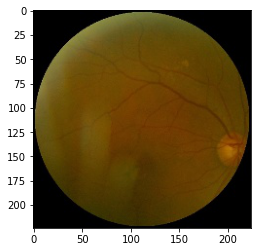

In [ ]:
imgplot = plt.imshow(datas[0])

In [ ]:
model1 = keras.Sequential()
model1.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(224,224,3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3), padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(224))
model1.add(Activation('relu'))
model1.add(Dense(112))
model1.add(Activation('relu'))
model1.add(Dense(8, activation='softmax'))
sgd = SGD(.001)

model1.compile(sgd,loss="categorical_crossentropy", metrics=["accuracy"])
#STEP_SIZE_TRAIN=data_train_generator.n//train_generator.batch_size
#STEP_SIZE_VALID=data_test_generator.n//valid_generator.batch_size
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_13 (Dense)             (None, 224)               44957920  
_________________________________________________________________
activation_13 (Activation)   (None, 224)              

In [ ]:
np.array(datas).shape,np.array(targets).shape


((8006, 224, 224, 3), (8006, 8))

In [ ]:
model1.fit(np.array(datas), np.array(targets),batch_size = 32)

251/251 [==============================] - 291s 1s/step - loss: nan - accuracy: 0.1284


In [ ]:
model1.save(PATH_DIRECTORY_MODELS+"/k1/b32/")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ReconnaissanceImages/Models/k1/b32/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/ReconnaissanceImages/Models/k1/b32/assets


In [ ]:
model2 = keras.Sequential()
model2.add(Conv2D(32, (3, 3), padding='same',
               input_shape=(224,224,3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dense(258))
model2.add(Activation('relu'))
model2.add(Dense(129))
model2.add(Activation('relu'))
model2.add(Dense(8, activation='softmax'))
sgd = SGD(.001)

model2.compile(sgd,loss="categorical_crossentropy", metrics=["accuracy"])
#STEP_SIZE_TRAIN=data_train_generator.n//train_generator.batch_size
#STEP_SIZE_VALID=data_test_generator.n//valid_generator.batch_size
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               102760960 
_________________________________________________________________
activation_15 (Activation)   (None, 512)              

In [ ]:
model2.fit(np.array(datas), np.array(targets))
model2.save(PATH_DIRECTORY_MODELS+"/k2_b0/")


251/251 [==============================] - 356s 1s/step - loss: nan - accuracy: 0.1249
INFO:tensorflow:Assets written to: /content/drive/MyDrive/ReconnaissanceImages/Models/k2_b0/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/ReconnaissanceImages/Models/k2_b0/assets


In [ ]:
model3 = keras.Sequential()
model3.add(Conv2D(32, (3, 3), padding='same',
               input_shape=(224,224,3), activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, (6, 6), activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(4, 4)))

model3.add(Conv2D(128, (12, 12), activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(8, 8)))

model3.add(Flatten())
model3.add(Dense(512), activation = 'relu')
model3.add(Dense(258), activation = 'relu')
model3.add(Dense(112), activation = 'relu')
model3.add(Dense(8, activation='softmax'))
sgd = SGD(.001)

model3.compile(sgd,loss="categorical_crossentropy", metrics=["accuracy"])
#STEP_SIZE_TRAIN=data_train_generator.n//train_generator.batch_size
#STEP_SIZE_VALID=data_test_generator.n//valid_generator.batch_size
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 107, 107, 64)      73792     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)       1179776   
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

In [ ]:
model4 = keras.Sequential()
model4.add(Conv2D(32, (3, 3), padding='same',
               input_shape=(224,224,3), activation = 'relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(64, (6,6), activation = 'relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(128, (12, 12), activation = 'relu'))
model4.add(MaxPooling2D(pool_size=(4, 4)))

model4.add(Flatten())
model4.add(Dense(1024, activation = 'relu'))
model4.add(Dropout(0.25))
model4.add(Dense(512, activation = 'relu'))
model4.add(Dropout(0.25))
model4.add(Dense(258, activation = 'relu'))
model4.add(Dropout(0.25))
model4.add(Dense(112, activation = 'relu'))
model4.add(Dropout(0.25))
model4.add(Dense(8, activation='softmax'))
sgd = SGD(.001)

model4.compile(sgd,loss="categorical_crossentropy", metrics=["accuracy"])
#STEP_SIZE_TRAIN=data_train_generator.n//train_generator.batch_size
#STEP_SIZE_VALID=data_test_generator.n//valid_generator.batch_size
model4.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 107, 107, 64)      73792     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 53, 53, 64)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 42, 42, 128)       1179776   
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 12800)           

In [ ]:
model4.fit(np.array(datas), np.array(targets))#,batch_size=128,epochs=10)
model4.save(PATH_DIRECTORY_MODELS+"/k4_/")

251/251 [==============================] - 9s 31ms/step - loss: 3.4584 - accuracy: 0.1368
INFO:tensorflow:Assets written to: /content/drive/MyDrive/ReconnaissanceImages/Models/k4_/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/ReconnaissanceImages/Models/k4_/assets


In [ ]:
model4.fit(np.array(datas), np.array(targets),batch_size=128,epochs=20)
model4.save(PATH_DIRECTORY_MODELS+"/k4_b128_e20/")

Epoch 1/20
63/63 [==============================] - 6s 94ms/step - loss: 1.6248 - accuracy: 0.3696
Epoch 2/20
63/63 [==============================] - 6s 94ms/step - loss: 1.5805 - accuracy: 0.3827
Epoch 3/20
63/63 [==============================] - 6s 94ms/step - loss: 1.5570 - accuracy: 0.3852
Epoch 4/20
63/63 [==============================] - 6s 94ms/step - loss: 1.5177 - accuracy: 0.4009
Epoch 5/20
63/63 [==============================] - 6s 94ms/step - loss: 1.4885 - accuracy: 0.4186
Epoch 6/20
63/63 [==============================] - 6s 94ms/step - loss: 1.4713 - accuracy: 0.4139
Epoch 7/20
63/63 [==============================] - 6s 94ms/step - loss: 1.4496 - accuracy: 0.4303
Epoch 8/20
63/63 [==============================] - 6s 94ms/step - loss: 1.4405 - accuracy: 0.4251
Epoch 9/20
63/63 [==============================] - 6s 94ms/step - loss: 1.4199 - accuracy: 0.4337
Epoch 10/20
63/63 [==============================] - 6s 94ms/step - loss: 1.3982 - accuracy: 0.4432
Epoch 11/

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ReconnaissanceImages/Models/k4_b128_e20/assets


Epoch 1/20
126/126 [==============================] - 8s 52ms/step - loss: 1.2827 - accuracy: 0.4831
Epoch 2/20
126/126 [==============================] - 7s 52ms/step - loss: 1.2440 - accuracy: 0.4923
Epoch 3/20
126/126 [==============================] - 7s 52ms/step - loss: 1.2457 - accuracy: 0.4934
Epoch 4/20
126/126 [==============================] - 7s 52ms/step - loss: 1.1989 - accuracy: 0.5105
Epoch 5/20
126/126 [==============================] - 7s 52ms/step - loss: 1.2049 - accuracy: 0.5025
Epoch 6/20
126/126 [==============================] - 7s 52ms/step - loss: 1.1725 - accuracy: 0.5137
Epoch 7/20
126/126 [==============================] - 7s 52ms/step - loss: 1.1676 - accuracy: 0.5196
Epoch 8/20
126/126 [==============================] - 7s 52ms/step - loss: 1.1608 - accuracy: 0.5245
Epoch 9/20
126/126 [==============================] - 7s 52ms/step - loss: 1.1325 - accuracy: 0.5271
Epoch 10/20
126/126 [==============================] - 7s 53ms/step - loss: 1.1083 - accura

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ReconnaissanceImages/Models/k4_b64_e20/assets


In [ ]:
model4.fit(np.array(datas), np.array(targets),batch_size=32,epochs=20)
model4.save(PATH_DIRECTORY_MODELS+"/k4_b32_e20/")

In [ ]:
if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
activation_2 (Activation)    (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 222, 222, 32)      9248      
_________________________________________________________________
activation_3 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 111, 111, 64)     

# Entrainement du modèle 1

# Analyse des Modèles

In [ ]:
#Chargement des images de test
df_data_test = pd.DataFrame(columns=["filename",'target','label'])

#CHARGEMENT DES FICHIERS DES IMAGES AUGMENTEES
import os
target_n = '[1, 0, 0, 0, 0, 0, 0, 0]'
target_d = '[0, 1, 0, 0, 0, 0, 0, 0]'
target_g = '[0, 0, 1, 0, 0, 0, 0, 0]'
target_c = '[0, 0, 0, 1, 0, 0, 0, 0]'
target_a = '[0, 0, 0, 0, 1, 0, 0, 0]'
target_h = '[0, 0, 0, 0, 0, 1, 0, 0]'
target_m = '[0, 0, 0, 0, 0, 0, 1, 0]'
target_o = '[0, 0, 0, 0, 0, 0, 0, 1]'

list_all=[]
list_d=[]
list_g=[]
list_c=[]
list_a=[]
list_h=[]
list_m=[]
list_o=[]

path = PATH_DIRECTORY_TEST
files = [dI for dI in os.listdir(path)]

files = [dI for dI in os.listdir(path+"/n/")]
i=0
for file in files:
  if (i<50) :
    list_all.append([file,target_n,'n'])
    i=i+1
  else:
    break
i=0
files = [dI for dI in os.listdir(path+"/d/")]
for file in files:
  if (i<50) :   
    list_all.append([file,target_d,'d'])
    i=i+1
  else:
    break
i=0
files = [dI for dI in os.listdir(path+"/g/")]
for file in files:  
  if (i<50) :   
    list_all.append([file,target_g,'g'])
    i=i+1
  else:
    break
i=0
files = [dI for dI in os.listdir(path+"/c/")]
for file in files:  
  if (i<50) :   
    list_all.append([file,target_c,'c'])
    i=i+1
  else:
    break
i=0
files = [dI for dI in os.listdir(path+"/a/")]
for file in files:  
  if (i<50) :   
    list_all.append([file,target_a,'a'])
    i=i+1
  else:
    break
i=0
files = [dI for dI in os.listdir(path+"/h/")]
for file in files:  
  if (i<50) :   
    list_all.append([file,target_h,'h'])
    i=i+1
  else:
    break
i=0
files = [dI for dI in os.listdir(path+"/m/")]
for file in files:  
  if (i<50) :   
    list_all.append([file,target_m,'m'])
    i=i+1
  else:
    break
i=0
files = [dI for dI in os.listdir(path+"/o/")]
for file in files:  
  if (i<50) :   
    list_all.append([file,target_o,'o'])
    i=i+1
  else:
    break


df_data_test = pd.DataFrame(list_all,columns=["filename",'target','label'])
df_data_test
targets_test = df_data_test['target'].apply(lambda x: json.loads(x))
df_targets_test = pd.DataFrame(targets_test)

In [ ]:
from imutils import paths
import cv2
import logging
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
datas_test = []
targets_test = []
#cp !cp example.txt /content/drive/MyDrive



def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

for ind in df_data_test.index:
  imagePath = PATH_DIRECTORY_TEST2+"/"+df_data_test.loc[ind]['label']+"/" + df_data_test.loc[ind]['filename']
  #logging.error(imagePath)
  image = mpimg.imread(imagePath)
  target = json.loads(df_data_test.loc[ind]['target'])
  datas_test.append(image)
  targets_test.append(target)

  

In [ ]:
#fonction de calcul de l'erreur par catégorie(n,d,g,c,a,h,m,o)
# nouvelles colonnes: Pn,Er pour prédictions de la catégorie n, et erreur de la catégorie n...
def get_dataframe_predictions_errors(df):
  df_new = df.copy()
  df_new['Pn'] = df_new[json_loads(df_new.labels) == target_n]

Modèle 3

In [ ]:
model = keras.models.load_model(PATH_DIRECTORY_MODELS+"/k3_b128_e10")

In [ ]:
pd.DataFrame(list(y_test))

,0
0,"[0, 1, 0, 0, 0, 0, 0, 0]"
1,"[1, 0, 0, 0, 0, 0, 0, 0]"
2,"[1, 0, 0, 0, 0, 0, 0, 0]"
3,"[0, 1, 0, 0, 0, 0, 0, 0]"
4,"[1, 0, 0, 0, 0, 0, 0, 0]"
...,...
1274,"[1, 0, 0, 0, 0, 0, 0, 0]"
1275,"[0, 1, 0, 0, 0, 0, 0, 0]"
1276,"[0, 1, 0, 0, 0, 0, 0, 0]"
1277,"[1, 0, 0, 0, 0, 0, 0, 0]"


In [ ]:
def get_pred_binaire(num):
  res= 0
  if (num>0.51):
     res = 1
  else:
    res = 0
  return res
def complete_matrice_res(df,ind,class_name):
  column1 = class_name+"pbin"
  column2 = class_name+"p"
  column3 = class_name+"e"
  column4 = class_name+"t"
  pbin = get_pred_binaire(df.loc[ind][column2])
  e = abs(pbin-df.loc[ind][column4])
  return (pbin,e)

In [ ]:
def make_dataframe_results(pred,y_test):
  df_pred=pd.DataFrame(pred)
  df_pred.columns = ["Np", "Dp","Gp","Cp","Ap","Hp","Mp","Op"]
  df_res = pd.DataFrame(y_test,columns=["target"])
  l = df_res["target"]
  res = []
  for index,value in l.items():
    res.append(json.loads(value))
  df_res_test = pd.DataFrame(res,columns=["Nt", "Dt","Gt","Ct","At","Ht","Mt","Ot"])
  df_res_complete = pd.DataFrame(columns=["Np", "Dp","Gp","Cp","Ap","Hp","Mp","Op","Npbin", "Dpbin","Gpbin","Cpbin","Apbin","Hpbin","Mpbin","Opbin","Nt", "Dt","Gt","Ct","At","Ht","Mt","Ot","Ne", "De","Ge","Ce","Ae","He","Me","Oe"])
  df_res_complete["Np"]=df_pred["Np"]
  df_res_complete["Dp"]=df_pred["Dp"]
  df_res_complete["Gp"]=df_pred["Gp"]
  df_res_complete["Cp"]=df_pred["Cp"]
  df_res_complete["Ap"]=df_pred["Ap"]
  df_res_complete["Hp"]=df_pred["Hp"]
  df_res_complete["Mp"]=df_pred["Mp"]
  df_res_complete["Op"]=df_pred["Op"]
  df_res_complete["Nt"]=df_res_test["Nt"]
  df_res_complete["Dt"]=df_res_test["Dt"]
  df_res_complete["Gt"]=df_res_test["Gt"]
  df_res_complete["Ct"]=df_res_test["Ct"]
  df_res_complete["At"]=df_res_test["At"]
  df_res_complete["Ht"]=df_res_test["Ht"]
  df_res_complete["Mt"]=df_res_test["Mt"]
  df_res_complete["Ot"]=df_res_test["Ot"]
  list_n = []
  list_d = []
  list_g = []
  list_c = []
  list_a = []
  list_h = []
  list_m = []
  list_o = []
  list_n_e = []
  list_d_e = []
  list_g_e = []
  list_c_e = []
  list_a_e = []
  list_h_e = []
  list_m_e = []
  list_o_e = []
  for ind in df_res_complete.index:
    (pbin,e) = complete_matrice_res(df_res_complete,ind,"N")
    list_n.append(pbin)
    list_n_e.append(e)
    pbin,e = complete_matrice_res(df_res_complete,ind,"D")
    list_d.append(pbin)
    list_d_e.append(e)
    pbin,e = complete_matrice_res(df_res_complete,ind,"G")
    list_g.append(pbin)
    list_g_e.append(e)
    pbin,e = complete_matrice_res(df_res_complete,ind,"C")
    list_c.append(pbin)
    list_c_e.append(e)
    pbin,e = complete_matrice_res(df_res_complete,ind,"A")
    list_a.append(pbin)
    list_a_e.append(e)
    pbin,e = complete_matrice_res(df_res_complete,ind,"H")
    list_h.append(pbin)
    list_h_e.append(e)
    pbin,e = complete_matrice_res(df_res_complete,ind,"M")
    list_m.append(pbin)
    list_m_e.append(e)
    pbin,e = complete_matrice_res(df_res_complete,ind,"O")
    list_o.append(pbin)
    list_o_e.append(e)
  df_res_complete["Npbin"]=list_n
  df_res_complete["Dpbin"]=list_d
  df_res_complete["Gpbin"]=list_g
  df_res_complete["Cpbin"]=list_c
  df_res_complete["Apbin"]=list_a
  df_res_complete["Hpbin"]=list_h
  df_res_complete["Mpbin"]=list_m
  df_res_complete["Opbin"]=list_o
  df_res_complete["Ne"]=list_n_e
  df_res_complete["De"]=list_d_e
  df_res_complete["Ge"]=list_g_e
  df_res_complete["Ce"]=list_c_e
  df_res_complete["Ae"]=list_a_e
  df_res_complete["He"]=list_h_e
  df_res_complete["Me"]=list_m_e
  df_res_complete["Oe"]=list_o_e
  return df_res_complete



In [ ]:
import numpy as np
import tensorflow.keras.backend as K
import numpy as np


model = keras.models.load_model(PATH_DIRECTORY_MODELS+"/k4_b64_e20/")
datas_test_input = np.array(datas_test)
pred = model.predict(datas_test_input)



df_res_complets = make_dataframe_results(pred,y_test)
df_res_complets

,Np,Dp,Gp,Cp,Ap,Hp,Mp,Op,Npbin,Dpbin,Gpbin,Cpbin,Apbin,Hpbin,Mpbin,Opbin,Nt,Dt,Gt,Ct,At,Ht,Mt,Ot,Ne,De,Ge,Ce,Ae,He,Me,Oe
0,0.446978,0.467543,0.004391,0.014234,0.019608,0.019787,3.946146e-03,0.023513,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.505327,0.493914,0.000031,0.000153,0.000188,0.000107,1.143688e-05,0.000269,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0.517480,0.480678,0.000129,0.000409,0.000621,0.000140,5.087306e-05,0.000491,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.375904,0.622835,0.000071,0.000092,0.000295,0.000359,4.019391e-05,0.000403,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.458952,0.540922,0.000007,0.000022,0.000043,0.000014,2.206091e-06,0.000037,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0.446136,0.553528,0.000027,0.000071,0.000059,0.000065,6.564579e-06,0.000107,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
368,0.596712,0.362457,0.004571,0.011598,0.013064,0.002196,1.875629e-03,0.007526,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
369,0.345707,0.645046,0.000265,0.000464,0.002977,0.001745,5.422423e-04,0.003254,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
370,0.405119,0.589359,0.000171,0.001242,0.001066,0.001037,6.726937e-05,0.001939,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0


In [ ]:
from sklearn.metrics import roc_auc_score
def make_roc_dataframe(df_res_complets):
  list_roc_scores = []
  list_roc_scores.append(roc_auc_score(df_res_complets["Nt"],df_res_complets["Np"]))
  list_roc_scores.append(roc_auc_score( df_res_complets["Dt"],df_res_complets["Np"]))
  list_roc_scores.append(roc_auc_score( df_res_complets["Gt"],df_res_complets["Np"]))
  list_roc_scores.append(roc_auc_score(df_res_complets["Ct"],df_res_complets["Np"]))
  list_roc_scores.append(roc_auc_score( df_res_complets["At"],df_res_complets["Np"]))
  list_roc_scores.append(roc_auc_score( df_res_complets["Ht"],df_res_complets["Np"]))
  list_roc_scores.append(roc_auc_score( df_res_complets["Mt"],df_res_complets["Np"]))
  list_roc_scores.append(roc_auc_score( df_res_complets["Ot"],df_res_complets["Np"]))
  df_roc_scores = pd.DataFrame([list_roc_scores],columns=["N","D","G","C","A","H","M","O"])
  return df_roc_scores

make_roc_dataframe(df_res_complets)

,N,D,G,C,A,H,M,O
0,0.555988,0.448475,0.420547,0.367079,0.482268,0.414402,0.678419,0.536184


In [ ]:
### precision
from sklearn.metrics import precision_score

def make_list_precision(df_res_complets):
  list_precisions = []
  list_precisions.append(precision_score(df_res_complets["Npbin"], df_res_complets["Nt"]))
  list_precisions.append(precision_score(df_res_complets["Dpbin"], df_res_complets["Dt"]))
  list_precisions.append(precision_score(df_res_complets["Gpbin"], df_res_complets["Gt"]))
  list_precisions.append(precision_score(df_res_complets["Cpbin"], df_res_complets["Ct"]))
  list_precisions.append(precision_score(df_res_complets["Apbin"], df_res_complets["At"]))
  list_precisions.append(precision_score(df_res_complets["Hpbin"], df_res_complets["Ht"]))
  list_precisions.append(precision_score(df_res_complets["Mpbin"], df_res_complets["Mt"]))
  list_precisions.append(precision_score(df_res_complets["Opbin"], df_res_complets["Ot"]))
  df_precision = pd.DataFrame([list_precisions],columns=["N","D","G","C","A","H","M","O"])
  return df_precision
make_list_precision(df_res_complets)

,N,D,G,C,A,H,M,O
0,0.383721,0.558824,0.0,0.052632,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics import confusion_matrix

list_matrix = []
def make_list_matrix(df_res_complets): 
  matrix_n = pd.DataFrame(confusion_matrix(df_res_complets["Npbin"], df_res_complets["Nt"]))
  matrix_d = pd.DataFrame(confusion_matrix(df_res_complets["Dpbin"], df_res_complets["Dt"]))
  matrix_g = pd.DataFrame(confusion_matrix(df_res_complets["Gpbin"], df_res_complets["Gt"]))
  matrix_c = pd.DataFrame(confusion_matrix(df_res_complets["Cpbin"], df_res_complets["Ct"]))
  matrix_a = pd.DataFrame(confusion_matrix(df_res_complets["Apbin"], df_res_complets["At"]))
  matrix_h = pd.DataFrame(confusion_matrix(df_res_complets["Hpbin"], df_res_complets["Ht"]))
  matrix_m = pd.DataFrame(confusion_matrix(df_res_complets["Mpbin"], df_res_complets["Mt"]))
  matrix_o = pd.DataFrame(confusion_matrix(df_res_complets["Opbin"], df_res_complets["Ot"]))
  return [matrix_n,matrix_d,matrix_g,matrix_c,matrix_a,matrix_h,matrix_m,matrix_o]


In [ ]:
matrix_n.T 

,0,1
0,185,15
1,159,13


In [ ]:

matrix_d.T

,0,1
0,85,185
1,35,67


In [ ]:

matrix_g.T

,0,1
0,355,0
1,17,0


In [ ]:

matrix_c.T

,0,1
0,352,1
1,18,1


In [ ]:

matrix_a.T

,0,1
0,356,0
1,16,0


In [ ]:

matrix_h.T

,0,1
0,368,0
1,4,0


In [ ]:

matrix_m.T

,0,1
0,328,33
1,11,0


In [ ]:

matrix_o.T

,0,1
0,341,0
1,31,0


# Modele 2 : VGG19

In [ ]:
vgg = VGG19(weights="imagenet",include_top = False,input_shape=(224,224,3))
for layer in vgg.layers:
    layer.trainable = False
modelvgg19 = Sequential()
modelvgg19.add(vgg)
modelvgg19.add(Flatten())
modelvgg19.add(Dense(8,activation="softmax"))
modelvgg19.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
modelvgg19.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 200712    
Total params: 20,225,096
Trainable params: 200,712
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:


vgg = VGG19(weights="imagenet",include_top = False,input_shape=(224,224,3))
for layer in vgg.layers:
    layer.trainable = False
modelvgg19 = Sequential()
modelvgg19.add(vgg)
modelvgg19.add(Flatten())
modelvgg19.add(Dense(1024, activation = 'relu'))
modelvgg19.add(Dropout(0.25))
modelvgg19.add(Dense(512, activation = 'relu'))
modelvgg19.add(Dropout(0.25))
modelvgg19.add(Dense(258, activation = 'relu'))
modelvgg19.add(Dropout(0.25))
modelvgg19.add(Dense(112, activation = 'relu'))
modelvgg19.add(Dropout(0.25))
modelvgg19.add(Dense(8, activation='softmax'))
sgd = SGD(.001)
modelvgg19.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
modelvgg19.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_15 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_58 (Dense)             (None, 1024)              25691136  
_________________________________________________________________
dropout_83 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_59 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_84 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 258)             

In [ ]:
modelvgg19.fit(np.array(datas), np.array(targets),batch_size=64,epochs=20)
modelvgg19.save(PATH_DIRECTORY_MODELS+"/kvgg19/kvgg64_20/")

Epoch 1/20
126/126 [==============================] - 18s 133ms/step - loss: 9.5348 - accuracy: 0.2501
Epoch 2/20
126/126 [==============================] - 17s 133ms/step - loss: 1.4327 - accuracy: 0.4492
Epoch 3/20
126/126 [==============================] - 17s 133ms/step - loss: 1.1255 - accuracy: 0.5271
Epoch 4/20
126/126 [==============================] - 17s 133ms/step - loss: 0.9303 - accuracy: 0.5945
Epoch 5/20
126/126 [==============================] - 17s 133ms/step - loss: 0.7448 - accuracy: 0.6610
Epoch 6/20
126/126 [==============================] - 17s 133ms/step - loss: 0.6974 - accuracy: 0.6843
Epoch 7/20
126/126 [==============================] - 17s 133ms/step - loss: 0.6838 - accuracy: 0.6971
Epoch 8/20
126/126 [==============================] - 17s 133ms/step - loss: 0.6236 - accuracy: 0.7227
Epoch 9/20
126/126 [==============================] - 17s 133ms/step - loss: 0.5290 - accuracy: 0.7594
Epoch 10/20
126/126 [==============================] - 17s 133ms/step - l

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ReconnaissanceImages/Models/kvgg19/kvgg64_20/assets


In [ ]:
loss,accuracy = modelvgg19.evaluate(X_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)

In [ ]:
modelvgg19 = keras.models.load_model(PATH_DIRECTORY_MODELS+"/kvgg19/kvgg19_b64_e20/")
pred = modelvgg19.predict(datas_test_input)



df_res_complets = make_dataframe_results(pred,y_test)
df_res_complets

,Np,Dp,Gp,Cp,Ap,Hp,Mp,Op,Npbin,Dpbin,Gpbin,Cpbin,Apbin,Hpbin,Mpbin,Opbin,Nt,Dt,Gt,Ct,At,Ht,Mt,Ot,Ne,De,Ge,Ce,Ae,He,Me,Oe
0,0.589082,0.410167,1.033183e-04,6.316629e-07,1.076437e-05,1.570702e-04,1.824700e-06,4.777203e-04,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,0.607895,0.392087,2.488858e-06,1.324382e-09,4.389215e-08,3.324450e-06,1.593202e-08,1.192622e-05,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.646150,0.353850,2.144448e-12,2.437584e-18,1.986067e-14,4.129940e-11,1.494444e-16,1.720842e-10,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.558096,0.441904,1.559549e-09,2.751582e-13,1.836693e-10,2.211673e-08,1.005194e-11,1.007733e-07,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
4,0.613905,0.386091,4.649312e-07,1.394613e-10,5.884504e-09,6.511137e-07,2.632767e-09,2.830008e-06,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0.607233,0.392759,6.238783e-07,2.461573e-10,2.503709e-08,1.853983e-06,2.040580e-09,5.659132e-06,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
368,0.617256,0.382743,5.969916e-08,6.581064e-12,1.632488e-09,2.960332e-07,9.344488e-11,8.803487e-07,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
369,0.623170,0.376830,3.142125e-08,1.842525e-12,3.258515e-10,8.362156e-08,3.366621e-11,3.550056e-07,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
370,0.592748,0.406070,3.341571e-04,2.561254e-06,9.090494e-06,1.556226e-04,1.631358e-05,6.644831e-04,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0


In [ ]:
df_res_complets.describe()

,Np,Dp,Gp,Cp,Ap,Hp,Mp,Op,Npbin,Dpbin,Gpbin,Cpbin,Apbin,Hpbin,Mpbin,Opbin,Nt,Dt,Gt,Ct,At,Ht,Mt,Ot,Ne,De,Ge,Ce,Ae,He,Me,Oe
count,372.000000,372.000000,3.720000e+02,3.720000e+02,3.720000e+02,3.720000e+02,3.720000e+02,3.720000e+02,372.000000,372.000000,372.000000,372.000000,372.000000,372.0,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000
mean,0.532079,0.353281,6.703962e-03,2.797380e-02,3.306933e-03,1.952465e-03,6.617470e-02,8.528044e-03,0.852151,0.005376,0.002688,0.029570,0.002688,0.0,0.067204,0.002688,0.462366,0.274194,0.045699,0.051075,0.043011,0.010753,0.029570,0.083333,0.486559,0.268817,0.048387,0.075269,0.045699,0.010753,0.096774,0.086022
std,0.189111,0.121453,5.661860e-02,1.533017e-01,3.767641e-02,1.107612e-02,2.391565e-01,4.095365e-02,0.355429,0.073225,0.051848,0.169626,0.051848,0.0,0.250713,0.051848,0.499253,0.446708,0.209113,0.220448,0.203155,0.103275,0.169626,0.276758,0.500492,0.443942,0.214872,0.264180,0.209113,0.103275,0.296048,0.280773
min,0.000000,0.000000,5.981155e-35,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.738435e-25,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.567177,0.360177,1.430997e-08,2.581384e-12,2.561819e-10,3.241665e-08,1.443143e-10,2.735098e-07,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.598060,0.389521,1.350436e-06,9.778437e-10,3.523373e-08,1.431451e-06,3.273396e-08,6.578496e-06,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.619514,0.412516,7.163782e-05,1.484278e-06,1.517982e-05,1.375149e-04,1.422708e-05,4.226482e-04,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.800915,0.516133,9.994798e-01,1.000000e+00,7.113591e-01,1.771999e-01,1.000000e+00,5.441709e-01,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
make_list_precision(df_res_complets)

,N,D,G,C,A,H,M,O
0,0.895349,0.019608,0.0,0.052632,0.0,0.0,0.0,0.0


In [ ]:
make_roc_dataframe(df_res_complets)

,N,D,G,C,A,H,M,O
0,0.52125,0.480501,0.589727,0.342851,0.564343,0.387908,0.61861,0.466512


In [ ]:
make_list_matrix(df_res_complets)
matrix_n

,0,1
0,185,159
1,15,13


In [ ]:
matrix_d

,0,1
0,85,35
1,185,67


In [ ]:
matrix_g

,0,1
0,355,17
1,0,0


In [ ]:
matrix_c

,0,1
0,352,18
1,1,1


In [ ]:
matrix_a

,0,1
0,356,16
1,0,0


In [ ]:
matrix_h

,0,1
0,368,4
1,0,0


In [ ]:
matrix_m

,0,1
0,328,11
1,33,0


In [ ]:
matrix_o

,0,1
0,341,31
1,0,0


# Comparatifs des modèles